In [82]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

#import linear regressor model from sk learn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [84]:
if __name__=="__main__":
    
    #extract data from csv 
    data = pd.read_csv('CAB420_Assessment_1A_Data/Data/Q1/communities.csv')
    print(data.shape)

(1994, 128)


In [86]:
#clean data 
occurrences = np.count_nonzero(data == '?',axis = 0)
print(occurrences)
print(occurrences.shape)
#remove first 5 columns 
data.drop([" state ", " county "," community "," communityname string"," fold "], axis = 1, inplace = True)
#remove columns with missing data
    #most sample didnt have values 1675 out of 1994
data.drop([" PolicBudgPerPop ", " LemasGangUnitDeploy "," LemasPctPolicOnPatr "," PolicOperBudg "," PolicCars "], axis = 1, inplace = True) 
data.drop([data.columns[112],data.columns[111],data.columns[110],data.columns[109],data.columns[108],data.columns[107],data.columns[106],data.columns[105],data.columns[104],data.columns[103],data.columns[102],data.columns[101],data.columns[100],data.columns[99],data.columns[98],data.columns[97],data.columns[96]], axis = 1, inplace = True) 
#remove row with missing value 

# Get indexes where name column has value ?
indexNames = data[data[' OtherPerCap '] == '?'].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
#print(data.shape)

[   0 1174 1177    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1675 1675 1675 1675 1675 1675 1675 1675 1675 1675 1675
 1675 1675 1675 1675 1675 1675    0    0    0 1675 1675 1675 1675    0
 1675    0]
(128,)


In [88]:
#check for no values 
occurrences = np.count_nonzero(data == '?',axis = 0)
#standardization of inputs
pass # todo 
#get X and Y 
X = data.iloc[:, :100]
Y = data.iloc[:, 100:]

In [90]:
#shuffle data
X, Y = shuffle(X, Y, random_state=None)

#splite data into testing/validation/training
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X,Y, train_size = .6, random_state = 0)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_remaining,Y_remaining, train_size = .5, random_state = 0)
#conver dp to numpy array 
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_valid = X_valid.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
Y_valid = Y_valid.to_numpy()

In [92]:
#create linear regressor 
print("linear regressor ---------------------------")

clf = GridSearchCV(LinearRegression(),{
        'copy_X' : [True,False],
        'normalize' : [True,False],
        'fit_intercept' : [True,False],
        },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)
#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)



LR = LinearRegression(copy_X= True, fit_intercept= False, normalize= True)
#{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': True}
LR.fit(X_train,Y_train)    

pred = LR.predict(X_test)


#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, pred))

linear regressor ---------------------------
0.5379947755160507
{'copy_X': True, 'fit_intercept': False, 'normalize': True}
Coefficients: 
 [[ 2.78607654e-01  1.10257047e-01  2.41890748e-01  3.96986309e-02
   2.94235826e-02  1.38486311e-01  1.78910383e-02 -1.35700470e-01
  -3.53335716e-02  1.58308755e-01 -2.51268019e-01  5.36674043e-02
  -2.58548261e-01 -1.13212545e-01  3.96980763e-02 -1.05390182e-01
   1.19804075e-01  1.53185201e-02 -5.29136264e-02  2.72151449e-01
   3.58825500e-02 -1.35699930e-01 -6.30097992e-03 -5.15755801e-02
   5.07680136e-02  4.91033434e-02 -4.99715207e-03  9.94968753e-03
  -5.23686726e-02 -1.45271184e-01  1.75098687e-01  7.61226740e-02
  -2.71832329e-02  3.61482148e-01 -5.94673898e-02 -5.93659823e-02
   1.01198204e-01  1.30287021e-01  5.47572021e-01  1.27814895e-01
   5.07635502e-01 -9.27048595e-01  3.21590842e-02 -1.69988351e-01
  -1.47790225e-01 -4.53043652e-02  8.63890782e-03  2.19350422e-02
  -1.86754628e-01  1.34919957e-01  8.79272175e-02 -2.41373109e-01
  

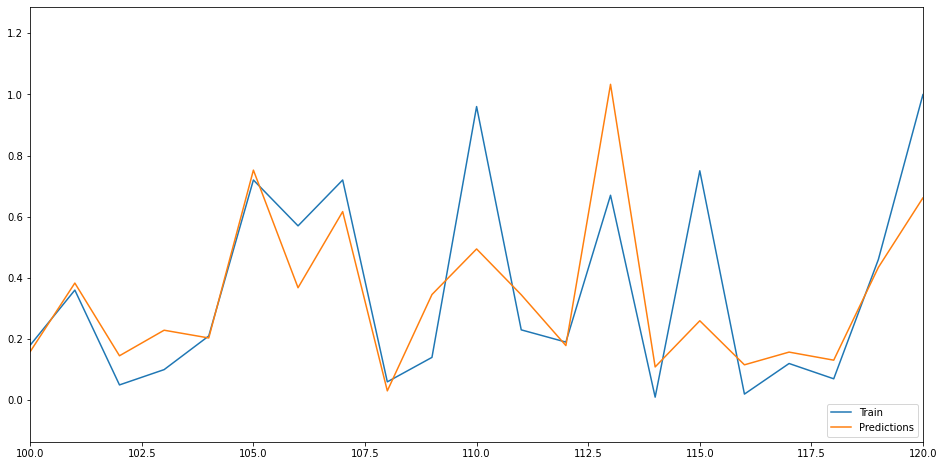

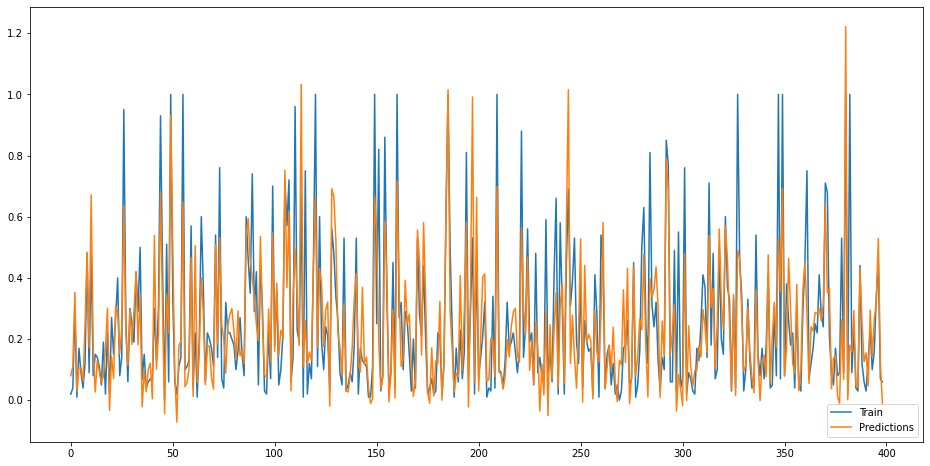

In [93]:

#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

In [94]:
print("Lasso---------------------------------")

clf = GridSearchCV(linear_model.Lasso(copy_X= True, fit_intercept= False, normalize= True),{
        'alpha' : [.0001,.0002,.0004,.0006,.0008,.002,.004,.006,.008,.01,.02,.04],
        },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)


#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

#create lasso regression model
LR_lasso = linear_model.Lasso(alpha=.002,copy_X= True, fit_intercept= False, normalize= True)
LR_lasso.fit(X_train,Y_train) 
pred_lasso = LR_lasso.predict(X_test)

#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', LR_lasso.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred_lasso))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, pred_lasso))



Lasso---------------------------------
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6137261284941644, tolerance: 0.0036500199999999995
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8588096596518051, tolerance: 0.00322478
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7241197247335829, tolerance: 0.00324406
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear

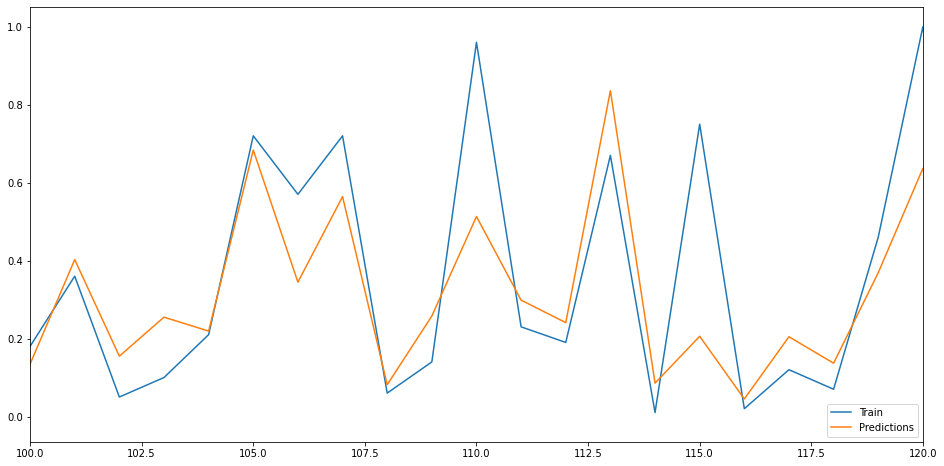

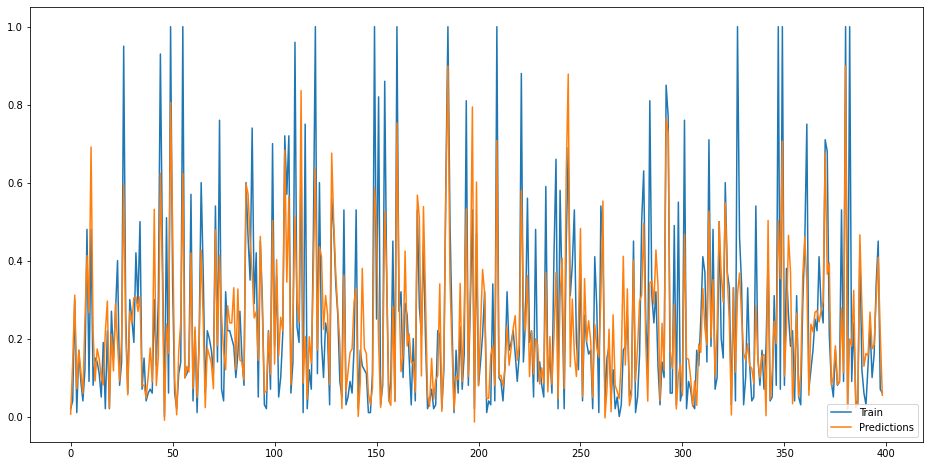

In [95]:
#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_lasso)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_lasso)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

In [96]:
print("Ridge---------------------------")

clf = GridSearchCV(linear_model.Ridge(copy_X= True, fit_intercept= False, normalize= True),{
        'alpha' : [1,5,10,15,20,25,30,35,40,45,50,55,60],
        },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)


#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

#create ridge regression model
LR_Ridge = linear_model.Ridge(alpha=15)
LR_Ridge.fit(X_train,Y_train) 
pred_Ridge = LR_Ridge.predict(X_test)

#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', LR_Ridge.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred_Ridge))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, pred_Ridge))

Ridge---------------------------
0.6488337364815608
{'alpha': 5}
Coefficients: 
 [[ 0.02122249  0.00782382  0.12229691 -0.07705963 -0.01365451  0.02257816
  -0.01122535 -0.0212497  -0.00800457  0.01374643  0.02047012  0.04716327
   0.00313185 -0.02521251 -0.00402927 -0.04705535  0.01409351  0.03489296
  -0.02830845  0.00285585  0.00583964  0.01587376 -0.00981648 -0.02775975
   0.03416627  0.03100278  0.00197626  0.03437213 -0.01326089 -0.00926143
   0.02654283 -0.005548   -0.02533442  0.00899061 -0.02155555 -0.02197991
   0.01821834 -0.01068061  0.04167661  0.00648217  0.02497519  0.03088466
   0.01165963 -0.06440988 -0.07723636 -0.065537   -0.04226225 -0.02427088
  -0.04409541  0.04633371  0.10363302 -0.003148    0.01876801  0.00557255
  -0.00553514 -0.00184767 -0.00315948  0.00141083  0.01076005  0.01452975
  -0.004047   -0.01490538  0.01177851  0.00785358  0.0124378  -0.00705288
   0.01475341 -0.01998203  0.04614676  0.01780182 -0.01530302  0.0532502
  -0.04810112 -0.00418863  0.060

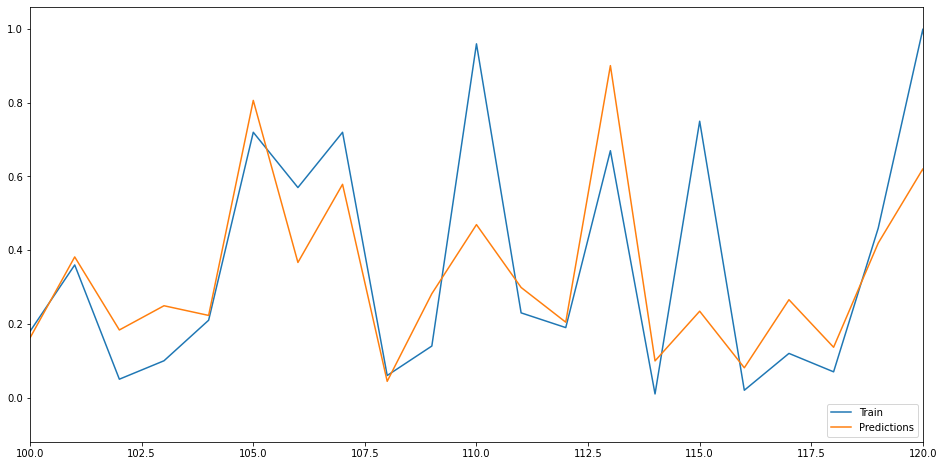

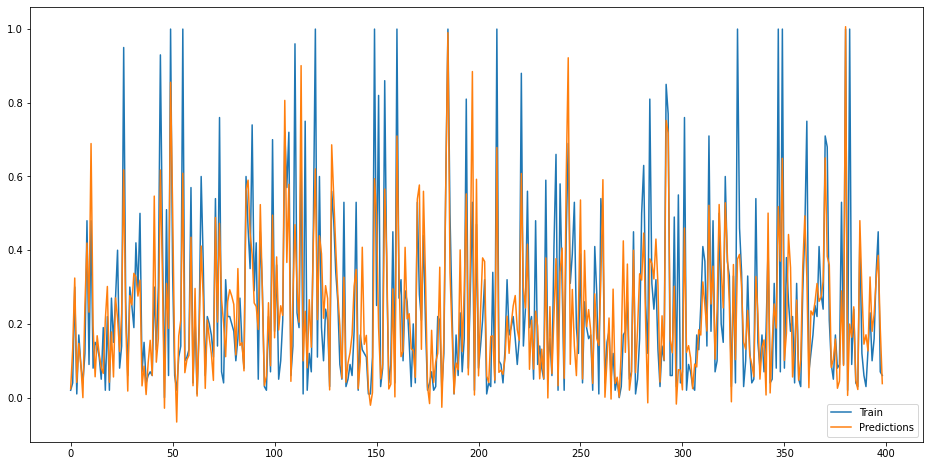

In [97]:
#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_Ridge)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_Ridge)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

#select lambda

#

In [98]:
pass